In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch_lr_finder import LRFinder
from tqdm import tqdm


2. In this coding exercise, you need to implement the training of a deep MLP on the MNIST dataset using PyTorch and manually tune the hyperparameters. Follow the steps below to proceed:

* Load the MNIST dataset using torchvision.datasets.MNIST. The dataset contains handwritten digit images, and it can be easily accessed through PyTorch's torchvision module.

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
input_size = 28*28
hidden_size = 20
num_classes = 10
num_epochs = 30
batch_size = 32
learning_rate= 0.1

In [4]:
# Load the MNIST dataset
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transforms.ToTensor())

* Define your deep MLP model. Specify the number of hidden layers, the number of neurons in each layer, and the activation function to be used. You can use the nn.Sequential container to stack the layers.

In [5]:

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes),
        )

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.model(x)
        return x
    
    
    
    
model = MLP(input_size,hidden_size, num_classes).to(device)
print(model)         

MLP(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=10, bias=True)
  )
)


* Set up the training loop and the hyperparameters. You can use the CrossEntropyLoss as the loss function and the Stochastic Gradient Descent (SGD) optimizer.

In [6]:
train_loader = DataLoader(train_data, batch_size=batch_size,
    shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, 
    shuffle = False)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr = learning_rate)

* Train the model by iterating over the training dataset for the specified number of epochs. Compute the loss, perform backpropagation, and update the model's parameters. 

In [8]:
#train
model.train()
for epoch in range(num_epochs):
    train_loss = 0.0
    correct = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
        predicted = outputs.argmax(1) 
        correct += (predicted == labels).sum().item()
    train_loss = train_loss/len(train_loader.dataset)
    accuracy = correct/len(train_loader.dataset)

    print(f"Epoch:{epoch+1} loss: {train_loss:7f}, accuracy: {accuracy:.2%}")

Epoch:1 loss: 0.467487, accuracy: 85.70%
Epoch:2 loss: 0.219509, accuracy: 93.36%
Epoch:3 loss: 0.179218, accuracy: 94.61%
Epoch:4 loss: 0.155090, accuracy: 95.30%
Epoch:5 loss: 0.138504, accuracy: 95.73%
Epoch:6 loss: 0.129803, accuracy: 96.03%
Epoch:7 loss: 0.121431, accuracy: 96.34%
Epoch:8 loss: 0.114966, accuracy: 96.43%
Epoch:9 loss: 0.108172, accuracy: 96.66%
Epoch:10 loss: 0.101375, accuracy: 96.87%
Epoch:11 loss: 0.099365, accuracy: 96.99%
Epoch:12 loss: 0.096491, accuracy: 96.97%
Epoch:13 loss: 0.093078, accuracy: 97.15%
Epoch:14 loss: 0.089966, accuracy: 97.19%
Epoch:15 loss: 0.088356, accuracy: 97.28%
Epoch:16 loss: 0.085644, accuracy: 97.28%
Epoch:17 loss: 0.083856, accuracy: 97.37%
Epoch:18 loss: 0.082361, accuracy: 97.35%
Epoch:19 loss: 0.079471, accuracy: 97.51%
Epoch:20 loss: 0.077985, accuracy: 97.50%
Epoch:21 loss: 0.076639, accuracy: 97.60%
Epoch:22 loss: 0.074852, accuracy: 97.60%
Epoch:23 loss: 0.073797, accuracy: 97.69%
Epoch:24 loss: 0.071866, accuracy: 97.78%
E

* Evaluate the trained model on the test dataset and calculate the accuracy (Please take a moment to consider the code below!)

In [9]:
# Evaluation
model.eval()
test_loss = 0.0
correct = 0
total = 0 
with torch.no_grad():
    for images, labels in test_loader :
        images = images.to(device)
        labels = labels.to(device)
        images = images.view(-1,28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)
    
        test_loss += loss.item()*images.size(0)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    test_loss = test_loss/len(test_loader.dataset)
    print('Test Loss: {:.6f}\n'.format(test_loss))
    print("Accuracy: {:.2f}%".format(accuracy))
    

Test Loss: 0.146717

Accuracy: 96.34%


###### there is quite some distance between test and train loss

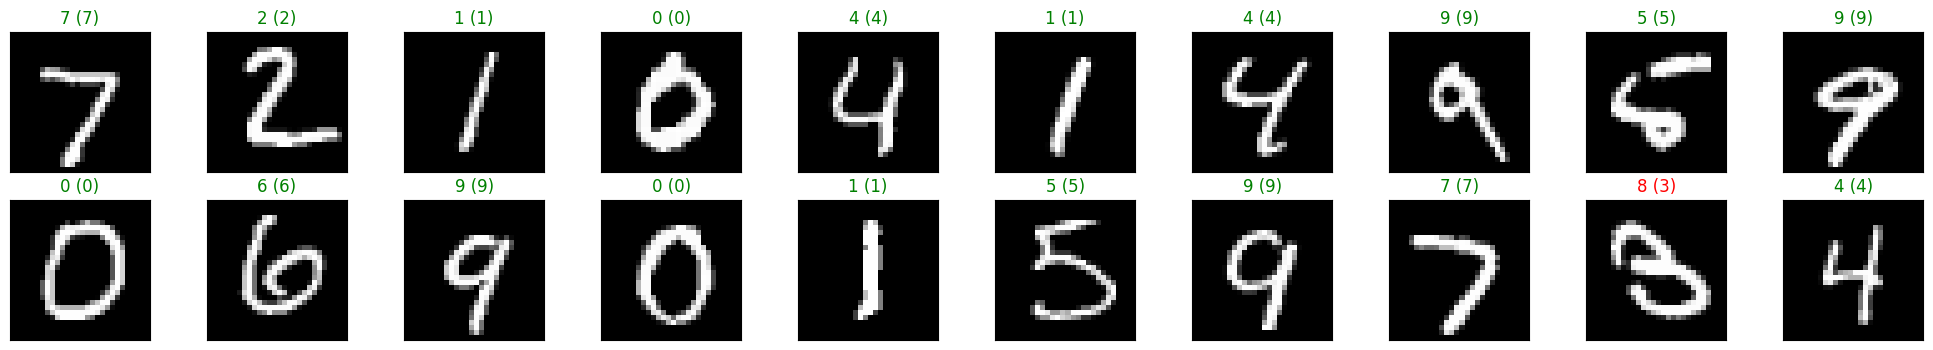

In [10]:
import matplotlib.pyplot as plt
import numpy as np


dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)
images = images.cpu().numpy()
labels = labels.cpu().numpy()

# Plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx])),
                 color=("green" if preds[idx] == labels[idx] else "red"))

plt.show()


###### It did well in all the images except for 3 that it predicts 8.

* Manually tune the hyperparameters, such as the learning rate, by experimenting with different values and observing the performance. You can also search for the optimal learning rate by using techniques like learning rate range test, where you gradually increase the learning rate and monitor the loss.

#### Manually

In [11]:
learning_rates = [0.1,0.01 ,0.001, 0.0001]

# Dictionary to store results
results = {'learning_rate': [], 'train_loss': [], 'test_loss': []}

for lr in learning_rates:
    # Reset model and optimizer for each learning rate
    model = MLP(input_size, hidden_size, num_classes).to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    model.train()
    for epoch in range(num_epochs):
        train_loss = 0.0
        correct = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs,labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*images.size(0)
            predicted = outputs.argmax(1) 
            correct += (predicted == labels).sum().item()
        train_loss = train_loss/len(train_loader.dataset)
        accuracy = correct/len(train_loader.dataset)

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            images = images.view(-1, 28 * 28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
        
            test_loss += loss.item() * images.size(0)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        test_accuracy = 100 * correct / total
        test_loss = test_loss / len(test_loader.dataset)

    # Store results
    results['learning_rate'].append(lr)
    results['train_loss'].append(train_loss)
    results['test_loss'].append(test_loss)
   

Text(0.5, 1.0, 'Training and Test Loss')

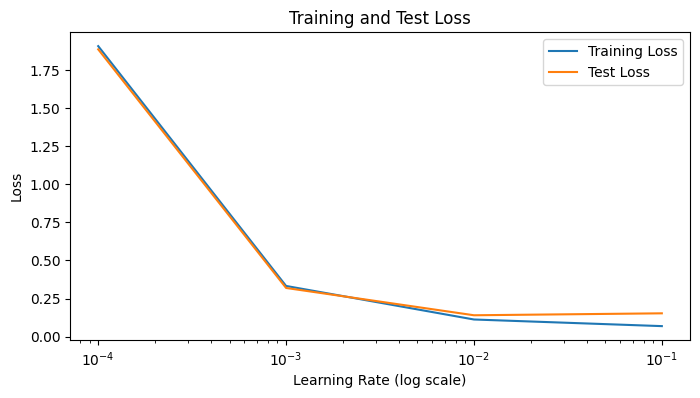

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(results['learning_rate'], results['train_loss'], label='Training Loss')
plt.plot(results['learning_rate'], results['test_loss'], label='Test Loss')
plt.xscale('log')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Loss')


###### 0.001 seems good!

#### LearingRateFinder

100%|██████████| 35/35 [01:12<00:00,  2.07s/it]


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.97E-02


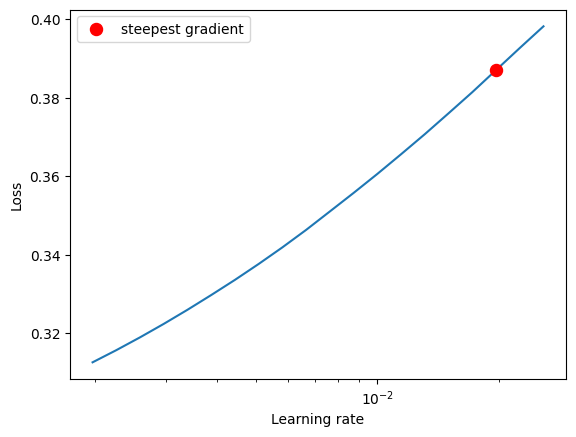

In [27]:
optimizer = optim.SGD(model.parameters(),lr = learning_rate)
lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(train_loader, val_loader=test_loader, start_lr = 0.1,end_lr=0.001, num_iter=35, step_mode="exp")
lr_finder.plot()
lr_finder.reset()

In [23]:
suggested_lr = lr_finder.history['lr'][lr_finder.history['loss'].index(lr_finder.best_loss)]
print(f"Suggested Learning Rate: {suggested_lr}")

Suggested Learning Rate: 0.001


#### Train Model with the Suggest Learning Rate

In [15]:
optimizer = optim.SGD(model.parameters(),lr = 0.001)
#train
model.train()
for epoch in range(60):
    train_loss = 0.0
    correct = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
        predicted = outputs.argmax(1) 
        correct += (predicted == labels).sum().item()
    train_loss = train_loss/len(train_loader.dataset)
    accuracy = correct/len(train_loader.dataset)

    print(f"Epoch:{epoch+1} loss: {train_loss:7f}, accuracy: {accuracy:.2%}")

Epoch:1 loss: 1.719078, accuracy: 47.55%
Epoch:2 loss: 1.374376, accuracy: 59.41%
Epoch:3 loss: 1.101859, accuracy: 68.17%
Epoch:4 loss: 0.903354, accuracy: 74.24%
Epoch:5 loss: 0.761450, accuracy: 78.08%
Epoch:6 loss: 0.663397, accuracy: 80.73%
Epoch:7 loss: 0.593819, accuracy: 82.75%
Epoch:8 loss: 0.542539, accuracy: 84.17%
Epoch:9 loss: 0.503242, accuracy: 85.45%
Epoch:10 loss: 0.472627, accuracy: 86.38%
Epoch:11 loss: 0.448673, accuracy: 87.06%
Epoch:12 loss: 0.429747, accuracy: 87.70%
Epoch:13 loss: 0.414044, accuracy: 88.21%
Epoch:14 loss: 0.401169, accuracy: 88.63%
Epoch:15 loss: 0.390313, accuracy: 88.92%
Epoch:16 loss: 0.381044, accuracy: 89.17%
Epoch:17 loss: 0.372777, accuracy: 89.42%
Epoch:18 loss: 0.365669, accuracy: 89.66%
Epoch:19 loss: 0.359024, accuracy: 89.79%
Epoch:20 loss: 0.353141, accuracy: 89.98%
Epoch:21 loss: 0.347677, accuracy: 90.14%
Epoch:22 loss: 0.342691, accuracy: 90.30%
Epoch:23 loss: 0.337824, accuracy: 90.38%
Epoch:24 loss: 0.333444, accuracy: 90.53%
E

In [17]:
# Evaluation
model.eval()
test_loss = 0.0
correct = 0
total = 0 
with torch.no_grad():
    for images, labels in test_loader :
        images = images.to(device)
        labels = labels.to(device)
        images = images.view(-1,28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)
    
        test_loss += loss.item()*images.size(0)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    test_loss = test_loss/len(test_loader.dataset)
    print('Test Loss: {:.6f}\n'.format(test_loss))
    print("Accuracy: {:.2f}%".format(accuracy))
    

Test Loss: 0.237571

Accuracy: 93.16%


###### it seems that with 0.001 learning rate loss of train and test are closer to eachother.

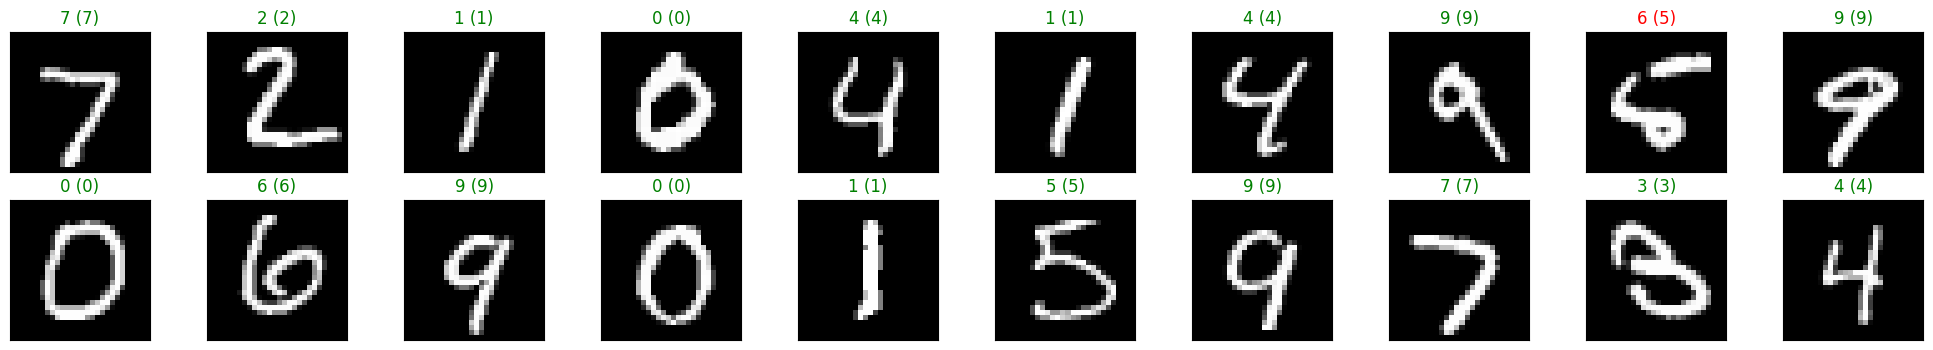

In [18]:
import matplotlib.pyplot as plt
import numpy as np


dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)
images = images.cpu().numpy()
labels = labels.cpu().numpy()

# Plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx])),
                 color=("green" if preds[idx] == labels[idx] else "red"))

plt.show()
